In [3999]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

input_path = "/kaggle/input"
if not os.path.exists("/kaggle/input"):
    input_path = "./kaggle/input"
    
for dirname, _, filenames in os.walk(input_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

./kaggle/input/crop-recommendation-dataset/Crop_recommendation.csv


In [4000]:
df = pd.read_csv(f"{input_path}/crop-recommendation-dataset/Crop_recommendation.csv")
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4001]:
df.describe([.01,.1,.2,.3,.4,.5,.6,.7,.8,.9,.99])

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
1%,0.000000,5.990000,7.990000,11.827382,15.225297,4.603202,21.903847
10%,8.000000,16.000000,16.000000,19.250363,36.663404,5.626977,43.944456
20%,17.000000,24.000000,19.000000,21.793720,54.299873,5.858209,57.195647
30%,24.000000,35.000000,22.000000,23.416304,63.185711,6.081450,68.831690
40%,31.000000,42.000000,25.000000,24.630712,70.887043,6.251520,79.268640
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624


In [4002]:
df[(df["label"] == "jute") & (df["rainfall"] > 199)].describe()

,N,P,K,temperature,humidity,ph,rainfall
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,77.333333,48.666667,37.666667,24.324934,73.246619,7.026049,199.549515
std,10.115994,6.806859,2.516611,2.004877,2.004177,0.592637,0.258183
min,71.000000,41.000000,35.000000,23.128444,70.957060,6.344752,199.335574
25%,71.500000,46.000000,36.500000,23.167639,72.528315,6.827915,199.406126
50%,72.000000,51.000000,38.000000,23.206835,74.099570,7.311077,199.476678
75%,80.500000,52.500000,39.000000,24.923180,74.391398,7.366698,199.656485
max,89.000000,54.000000,40.000000,26.639525,74.683227,7.422318,199.836291


In [4003]:
df[(df["label"] == "rice") & (df["rainfall"] < 200)].describe()

,N,P,K,temperature,humidity,ph,rainfall
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,82.000000,45.750000,39.400000,24.138158,82.281956,6.227565,189.891693
std,10.925586,7.621818,3.067658,2.040412,1.453518,0.714431,5.682657
min,65.000000,35.000000,35.000000,20.280194,80.335029,5.005307,182.561632
25%,72.750000,40.000000,36.750000,22.587787,81.215793,5.745616,184.877834
50%,81.000000,45.500000,39.500000,24.673616,82.135815,6.088796,190.183619
75%,91.500000,51.750000,42.000000,25.625370,83.118299,6.800078,194.706200
max,99.000000,57.000000,44.000000,26.884449,84.969072,7.382763,198.673094


In [4004]:
df[(df["label"] == "lentil") & (df["N"] >= 20)].describe([.01,.1,.2,.3,.4,.5,.6,.7,.8,.9,.99])

,N,P,K,temperature,humidity,ph,rainfall
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,30.711111,67.866667,18.977778,24.646028,64.390934,6.902426,46.001984
std,5.683398,7.569676,3.115131,3.194585,2.766274,0.598932,5.894560
min,21.000000,55.000000,15.000000,18.064861,60.194614,5.916454,35.034848
1%,21.440000,55.440000,15.000000,18.162893,60.227142,5.920387,35.181573
10%,22.400000,58.400000,15.000000,20.541569,60.554870,6.161812,37.601460
20%,26.000000,60.800000,16.000000,21.309387,61.993192,6.291227,40.433043
30%,27.200000,62.200000,16.200000,23.080822,62.791370,6.431617,42.000308
40%,28.000000,65.000000,17.000000,23.941434,63.365071,6.670261,45.201747
50%,31.000000,67.000000,18.000000,25.089661,63.901642,6.950301,46.623702


In [4005]:
df[(df["label"] == "blackgram") & (df["N"] <= 40) & (df["temperature"] < 30)].describe([.01,.1,.2,.3,.4,.5,.6,.7,.8,.9,.99])

,N,P,K,temperature,humidity,ph,rainfall
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,27.095238,68.904762,20.142857,27.800977,65.721447,7.060349,67.843112
std,6.040735,7.272584,3.102994,1.460487,2.845000,0.302761,4.401469
min,20.000000,60.000000,15.000000,25.097374,60.448484,6.500145,61.192509
1%,20.000000,60.000000,15.000000,25.187820,60.595259,6.518908,61.336424
10%,20.000000,62.000000,16.000000,25.658425,61.888711,6.621324,62.273735
20%,21.000000,62.000000,17.000000,26.417683,63.536045,6.808042,63.183053
30%,24.000000,63.000000,19.000000,27.161591,63.954255,6.920090,64.421771
40%,25.000000,65.000000,19.000000,27.543848,64.255107,7.026795,67.150964
50%,26.000000,67.000000,20.000000,28.386865,65.717658,7.108450,67.833459


In [4006]:
X = df.loc[:, df.columns != "label"].astype(float)
y = df.loc[:, df.columns == "label"].astype(str)
X.shape, y.shape

((2200, 7), (2200, 1))

In [4007]:
corr = X.corr()
corr.style.background_gradient(cmap="coolwarm", axis=None).format(precision=2)

,N,P,K,temperature,humidity,ph,rainfall
N,1.00,-0.23,-0.14,0.03,0.19,0.10,0.06
P,-0.23,1.00,0.74,-0.13,-0.12,-0.14,-0.06
K,-0.14,0.74,1.00,-0.16,0.19,-0.17,-0.05
temperature,0.03,-0.13,-0.16,1.00,0.21,-0.02,-0.03
humidity,0.19,-0.12,0.19,0.21,1.00,-0.01,0.09
ph,0.10,-0.14,-0.17,-0.02,-0.01,1.00,-0.11
rainfall,0.06,-0.06,-0.05,-0.03,0.09,-0.11,1.00


## Engineered Features

- **n_ratio**: This feature represents the ratio of nitrogen (N) content to the total sum of nitrogen, phosphorus (P), and potassium (K) content. It indicates the proportion of nitrogen compared to the other nutrients.

- **p_ratio**: Similarly, the p_ratio feature represents the ratio of phosphorus (P) content to the total sum of N, P, and K content. It provides insights into the proportion of phosphorus compared to the other nutrients.

- **k_ratio**: The k_ratio feature denotes the ratio of potassium (K) content to the total sum of N, P, and K content. It reveals the proportion of potassium compared to the other nutrients.

- **n_k_ratio**: This feature expresses the ratio of nitrogen (N) content to potassium (K) content alone, without considering the other nutrients. It highlights the relationship between nitrogen and potassium.

- **p_k_ratio**: Similarly, the p_k_ratio feature represents the ratio of phosphorus (P) content to potassium (K) content alone. It indicates the relationship between phosphorus and potassium.

- **ph_acidic**: This feature categorizes the pH level as acidic. It is set to True if the pH value is less than 6, indicating acidity.

- **ph_neutral**: The ph_neutral feature categorizes the pH level as neutral. It is set to True if the pH value is between 6 and 8, inclusively.

- **ph_alkaline**: This feature categorizes the pH level as alkaline. It is set to True if the pH value is greater than 8, indicating alkalinity.

- **rainfall_low_N_low**: This feature identifies conditions with low rainfall (less than 55) and low nitrogen (N) content (equal to or less than 40). It indicates a specific combination of rainfall and nitrogen levels.

- **rainfall_moderate_temperature_moderate**: This feature captures conditions with moderate rainfall (between 61 and 75) and moderate temperature (between 25 and 30). It represents a specific combination of rainfall and temperature.

- **rainfall_high_humidity_low_temperature_high**: This feature identifies conditions with high rainfall (greater than 199), low humidity (less than 75), and high temperature (greater than 25). It represents a combination of rainfall, humidity, and temperature.

In [4008]:
# X["n_ratio"] = X["N"] / (X["N"] + X["P"] + X["K"])
# X["p_ratio"] = X["P"] / (X["N"] + X["P"] + X["K"])
# X["k_ratio"] = X["K"] / (X["N"] + X["P"] + X["K"])
# X["n_k_ratio"] = X["N"] / X["K"]
# X["p_k_ratio"] = X["P"] / X["K"]
# X["ph_acidic"] = X["ph"] < 6
# X["ph_neutral"] = (X["ph"] >= 6) & (X["ph"] <= 8)
# X["ph_alkaline"] = X["ph"] > 8
X["rainfall_low_N_low"] = (X["rainfall"] < 55) & (X["N"] <= 40)
X["rainfall_moderate_temperature_moderate"] = (X["rainfall"] > 61) & (X["rainfall"] < 75) & (X["temperature"] > 25) & (X["temperature"] < 30)
X["rainfall_high_humidity_low_temperature_high"] = (X["rainfall"] > 199) & (X["humidity"] < 75) & (X["temperature"] > 25)
X = X.astype(float)

corr = X.corr()
corr.style.background_gradient(cmap="coolwarm", axis=None).format(precision=2)

,N,P,K,temperature,humidity,ph,rainfall,rainfall_low_N_low,rainfall_moderate_temperature_moderate,rainfall_high_humidity_low_temperature_high
N,1.00,-0.23,-0.14,0.03,0.19,0.10,0.06,-0.29,-0.07,0.03
P,-0.23,1.00,0.74,-0.13,-0.12,-0.14,-0.06,0.03,0.13,-0.01
K,-0.14,0.74,1.00,-0.16,0.19,-0.17,-0.05,-0.19,0.02,-0.01
temperature,0.03,-0.13,-0.16,1.00,0.21,-0.02,-0.03,0.08,0.08,0.00
humidity,0.19,-0.12,0.19,0.21,1.00,-0.01,0.09,-0.04,-0.04,-0.01
ph,0.10,-0.14,-0.17,-0.02,-0.01,1.00,-0.11,0.13,0.13,0.01
rainfall,0.06,-0.06,-0.05,-0.03,0.09,-0.11,1.00,-0.37,-0.14,0.05
rainfall_low_N_low,-0.29,0.03,-0.19,0.08,-0.04,0.13,-0.37,1.00,-0.08,-0.01
rainfall_moderate_temperature_moderate,-0.07,0.13,0.02,0.08,-0.04,0.13,-0.14,-0.08,1.00,-0.01
rainfall_high_humidity_low_temperature_high,0.03,-0.01,-0.01,0.00,-0.01,0.01,0.05,-0.01,-0.01,1.00


In [4009]:
print("Features:")
X.head()

Features:


,N,P,K,temperature,humidity,ph,rainfall,rainfall_low_N_low,rainfall_moderate_temperature_moderate,rainfall_high_humidity_low_temperature_high
0,90.0,42.0,43.0,20.879744,82.002744,6.502985,202.935536,0.0,0.0,0.0
1,85.0,58.0,41.0,21.770462,80.319644,7.038096,226.655537,0.0,0.0,0.0
2,60.0,55.0,44.0,23.004459,82.320763,7.840207,263.964248,0.0,0.0,0.0
3,74.0,35.0,40.0,26.491096,80.158363,6.980401,242.864034,0.0,0.0,0.0
4,78.0,42.0,42.0,20.130175,81.604873,7.628473,262.717340,0.0,0.0,0.0


In [4010]:
print("Labels:")
y = pd.get_dummies(y)
y.head()

Labels:


,label_apple,label_banana,label_blackgram,label_chickpea,label_coconut,label_coffee,label_cotton,label_grapes,label_jute,label_kidneybeans,...,label_mango,label_mothbeans,label_mungbean,label_muskmelon,label_orange,label_papaya,label_pigeonpeas,label_pomegranate,label_rice,label_watermelon
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [4011]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)
X_test.head()

,N,P,K,temperature,humidity,ph,rainfall,rainfall_low_N_low,rainfall_moderate_temperature_moderate,rainfall_high_humidity_low_temperature_high
1976,112.0,54.0,15.0,25.462288,81.566419,6.175492,76.885825,0.0,0.0,0.0
705,50.0,55.0,16.0,28.814607,65.335381,7.581443,62.262425,0.0,1.0,0.0
1082,90.0,86.0,55.0,27.962368,84.154036,5.644487,97.559867,0.0,0.0,0.0
1467,89.0,11.0,47.0,29.787140,94.653435,6.327823,27.865944,0.0,0.0,0.0
1660,31.0,25.0,12.0,18.051424,90.039696,7.016482,111.779389,0.0,0.0,0.0


In [4012]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler

column_transformer = make_column_transformer(
    (MinMaxScaler(), ["N", "P", "K", "temperature", "humidity", "ph", "rainfall"]), 
    remainder="passthrough")
column_transformer.fit(X_train)
column_transformer.get_feature_names_out()

array(['minmaxscaler__N', 'minmaxscaler__P', 'minmaxscaler__K',
       'minmaxscaler__temperature', 'minmaxscaler__humidity',
       'minmaxscaler__ph', 'minmaxscaler__rainfall',
       'remainder__rainfall_low_N_low',
       'remainder__rainfall_moderate_temperature_moderate',
       'remainder__rainfall_high_humidity_low_temperature_high'],
      dtype=object)

In [4013]:
X_train = pd.DataFrame(column_transformer.transform(X_train), columns=column_transformer.get_feature_names_out())
X_test = pd.DataFrame(column_transformer.transform(X_test), columns=column_transformer.get_feature_names_out())

In [4014]:
print("Features scaled:")
X_train.head()

Features scaled:


,minmaxscaler__N,minmaxscaler__P,minmaxscaler__K,minmaxscaler__temperature,minmaxscaler__humidity,minmaxscaler__ph,minmaxscaler__rainfall,remainder__rainfall_low_N_low,remainder__rainfall_moderate_temperature_moderate,remainder__rainfall_high_humidity_low_temperature_high
0,0.071429,0.385714,0.050,0.602721,0.875442,0.438430,0.138875,0.0,0.0,0.0
1,0.014286,0.135714,0.145,0.575854,0.473024,0.461565,0.267836,0.0,0.0,0.0
2,0.164286,0.214286,0.065,0.506894,0.386209,0.296989,0.060293,1.0,0.0,0.0
3,0.778571,0.185714,0.110,0.408434,0.421680,0.539488,0.518364,0.0,0.0,0.0
4,0.785714,0.142857,0.245,0.576341,0.892705,0.454281,0.011614,0.0,0.0,0.0


In [4015]:
import tensorflow as tf

print(tf.__version__)

for device in tf.config.list_physical_devices():
    print(device)

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

tf.__version__

2.12.0
PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')
PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')
Num GPUs Available:  1


'2.12.0'

In [4016]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dense(y.shape[1], activation="softmax"),
])

In [4017]:
lr = 5e-3
model.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=lr), metrics=["accuracy"])

In [4018]:
scheduler = lambda epoch: lr if epoch <= 7 else lr * (1 / np.log2(epoch - 5))
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=20),
    tf.keras.callbacks.LearningRateScheduler(scheduler),    
    ]

model.fit(X_train, y_train, epochs=500, validation_split=0.15, callbacks=callbacks)

Epoch 1/500
50/50 [==============================] - 6s 93ms/step - loss: 1.4062 - accuracy: 0.5658 - val_loss: 0.5587 - val_accuracy: 0.7616 - lr: 0.0050
Epoch 2/500
50/50 [==============================] - 3s 52ms/step - loss: 0.4248 - accuracy: 0.8439 - val_loss: 0.4739 - val_accuracy: 0.8648 - lr: 0.0050
Epoch 3/500
50/50 [==============================] - 2s 42ms/step - loss: 0.3439 - accuracy: 0.8729 - val_loss: 0.1615 - val_accuracy: 0.9502 - lr: 0.0050
Epoch 4/500
50/50 [==============================] - 2s 42ms/step - loss: 0.1859 - accuracy: 0.9276 - val_loss: 0.1952 - val_accuracy: 0.9110 - lr: 0.0050
Epoch 5/500
50/50 [==============================] - 2s 39ms/step - loss: 0.1994 - accuracy: 0.9251 - val_loss: 0.0833 - val_accuracy: 0.9893 - lr: 0.0050
Epoch 6/500
50/50 [==============================] - 2s 39ms/step - loss: 0.1351 - accuracy: 0.9547 - val_loss: 0.0973 - val_accuracy: 0.9609 - lr: 0.0050
Epoch 7/500
50/50 [==============================] - 2s 40ms/step - lo

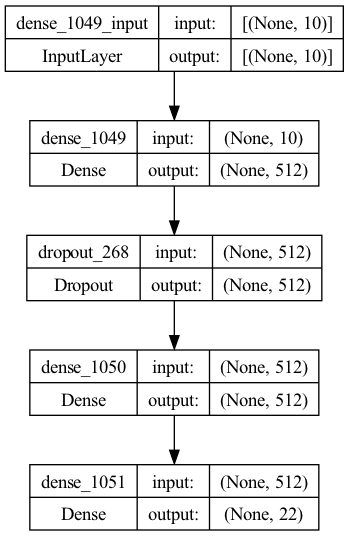

In [4019]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

In [4020]:
model.summary()

Model: "sequential_172"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1049 (Dense)          (None, 512)               5632      
                                                                 
 dropout_268 (Dropout)       (None, 512)               0         
                                                                 
 dense_1050 (Dense)          (None, 512)               262656    
                                                                 
 dense_1051 (Dense)          (None, 22)                11286     
                                                                 
Total params: 279,574
Trainable params: 279,574
Non-trainable params: 0
_________________________________________________________________


In [4021]:
model.evaluate(X_test, y_test)

11/11 [==============================] - 1s 50ms/step - loss: 0.0153 - accuracy: 0.9939


[0.015270118601620197, 0.9939393997192383]

In [4022]:
from sklearn.metrics import accuracy_score

num_classes = y_test.shape[1]
preds = model.predict(X_test)
preds_argmax = tf.argmax(preds, axis=1)
y_pred = tf.one_hot(preds_argmax, num_classes)
accuracy_score(y_test, y_pred)

11/11 [==============================] - 0s 13ms/step


0.9939393939393939

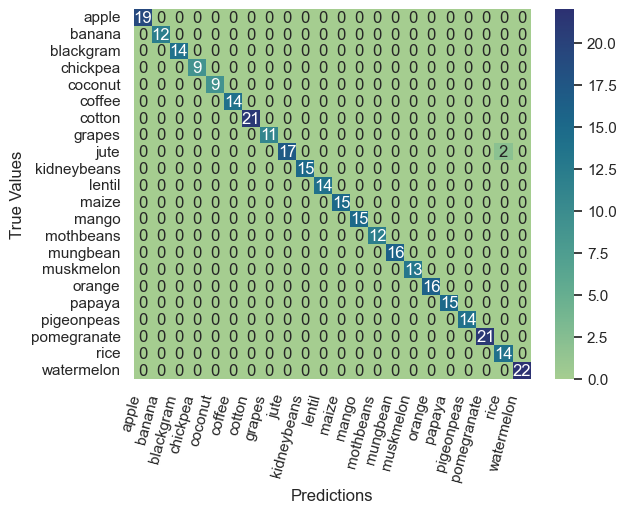

In [4023]:
import seaborn as sns
import matplotlib.pyplot as plt

label_names = [name[6:] for name in y.columns]
y_test_argmax = tf.argmax(y_test, axis=1)
confusion_matrix = tf.math.confusion_matrix(y_test_argmax, preds_argmax, num_classes)
ax = sns.heatmap(confusion_matrix, cmap="crest", annot=True, yticklabels=label_names)
ax.set_xticklabels(label_names, rotation=75, ha="right")
ax.set(xlabel="Predictions", ylabel="True Values")
plt.show()